# Module 1 - Getting Started

## What is a configuration tree?

Device Framwork works differently than most API tools because it models the API into objects much like the GUI does. For example, you might be used to working with an XPath to an address object like this:

`/config/devices/entry[@name="localhost.localdomain"]/vsys/entry[@name="vsys1"]/address/entry[@name="MyAddress"]`

Instead, Device Framwork uses objects in python, so the above xpath would be an object you create like this:

`myaddress = objects.AddressObject('MyAddress')`

Much simpler!

When we combine these objects into a hierarchy, then we get a tree called the **Configuration Tree**.  The configuration tree is a representation of a firewall's configuration using a tree of objects in memory.

Let's look at an example. Run the following code cells using the <button class='btn btn-default btn-xs'><i class="icon-step-forward fa fa-step-forward"></i></button> **Run** button or `shift-enter`.

**Step 1:** Import the pandevice library.  Modules in the library are generally named for the tabs at the top of the Firewall and Panorama GUI. We'll import the **firewall** and **objects** modules.

In [6]:
from pandevice import firewall, objects

**Step 2:** Then create a couple objects and put them in a simple tree

In [4]:
# Create a firewall object and an address object
fw = firewall.Firewall('10.30.11.101', 'admin', 'Ignite18')
apache = objects.AddressObject('ApacheServer', '5.5.5.5')

# Now make the address object a child of the firewall object using add()
fw.add(apache)

<AddressObject ApacheServer 0x7fe6a0983780>

**Step 3:** Let's see that configuration tree we just created (using graphviz)

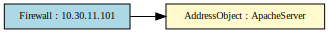

In [5]:
fw.tree()

You should see a configuration tree with two objects. Firewall is the **root** object, and the **parent** of the AddressObject.  The AddressObject is the **child**.

Connect to the firewall GUI using the student portal and login. In the firewall GUI, navigate to **Objects -> Address** and notice the ApacheServer object isn't there yet.  That's because the configuration tree we created is in memory in python only. It hasn't been sent to the firewall yet.  Let's do that next.

In [ ]:
apache.create()

Now check the firewall GUI again and click refresh to see the newly created object.

TODO: Add photo of refresh button here.

## Modifying configuration